
# Generate a Readme file out of a pickle

In [1]:
import pickle
from qiskit import *
from qiskit import Aer
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt

import numpy as np

In [2]:
#read pickle
path = "runs/experiments/optimizer_hyperparameters/"
experiment_data = pickle.load(open(path + "AMSGRAD.p", "rb"))

In [3]:
name = experiment_data[0]['optimizerName']

In [4]:
experiment_data[0]['results']

[{'scoreTraining': [0.39285714285714285,
   0.33035714285714285,
   0.4017857142857143,
   0.29464285714285715,
   0.3125,
   0.32142857142857145,
   0.36607142857142855,
   0.35714285714285715,
   0.3125,
   0.35714285714285715,
   0.4017857142857143,
   0.3482142857142857,
   0.3482142857142857],
  'scoreTesting': [0.23684210526315788,
   0.2631578947368421,
   0.2631578947368421,
   0.2894736842105263,
   0.2894736842105263,
   0.5526315789473685,
   0.2894736842105263,
   0.3684210526315789,
   0.2894736842105263,
   0.39473684210526316,
   0.2631578947368421,
   0.3157894736842105,
   0.21052631578947367],
  'finalWeights': [array([0.40836498]),
   array([0.69068059]),
   array([0.22733561]),
   array([0.81699772]),
   array([0.71275526]),
   array([0.01531559]),
   array([0.27945095]),
   array([0.14642235]),
   array([0.70119702]),
   array([0.02645418]),
   array([0.20438714]),
   array([0.48110502]),
   array([0.67302682])],
  'losses': [[281.36328125],
   [274.4755859375],
  

In [5]:
experiment_data[0]['results'][1]

{'scoreTraining': [0.29464285714285715,
  0.35714285714285715,
  0.36607142857142855,
  0.36607142857142855,
  0.2767857142857143,
  0.41964285714285715,
  0.36607142857142855,
  0.36607142857142855,
  0.2857142857142857,
  0.3392857142857143,
  0.375,
  0.35714285714285715,
  0.3482142857142857],
 'scoreTesting': [0.3157894736842105,
  0.4473684210526316,
  0.2631578947368421,
  0.34210526315789475,
  0.34210526315789475,
  0.18421052631578946,
  0.2631578947368421,
  0.3157894736842105,
  0.21052631578947367,
  0.2894736842105263,
  0.3684210526315789,
  0.2631578947368421,
  0.3157894736842105],
 'finalWeights': [array([0.67363772, 0.71065729, 0.76653014, 0.49952433]),
  array([0.69457714, 0.21827956, 0.08581743, 0.13096658]),
  array([0.54741926, 0.47693806, 0.65501984, 0.55894204]),
  array([0.56043996, 0.37709059, 0.67385258, 0.41426055]),
  array([0.28644553, 0.84852166, 0.06941269, 0.45131243]),
  array([0.34786383, 0.36776083, 0.89298948, 0.42627496]),
  array([0.93535749, 0.5

In [6]:
settings = []
train_acc_per_circuit = []
test_acc_per_circuit = []
train_acc_per_circuit_temp = []
test_acc_per_circuit_temp = []
for i in range(len(experiment_data[0]['results'])):
    train_acc_per_circuit.append([])
    test_acc_per_circuit.append([])
    train_acc_per_circuit_temp.append([])
    test_acc_per_circuit_temp.append([])

for i, experiment in enumerate(experiment_data):
    results = experiment['results']
    settings.append(experiment['optimizerSettings'])
    for j, result in enumerate(results):
        train_acc_per_circuit[j].append(result['scoreTraining'])
        test_acc_per_circuit[j].append(result['scoreTesting'])

train_acc_per_circuit = np.array(train_acc_per_circuit)
test_acc_per_circuit = np.array(test_acc_per_circuit)

for i in range(len(train_acc_per_circuit)):
    train_acc_per_circuit_temp[i].append(train_acc_per_circuit[i].flatten())
    test_acc_per_circuit_temp[i].append(test_acc_per_circuit[i].flatten())

train_acc_per_circuit = np.array(train_acc_per_circuit_temp)
test_acc_per_circuit = np.array(test_acc_per_circuit_temp)


In [7]:
number_of_circuits = len(train_acc_per_circuit)

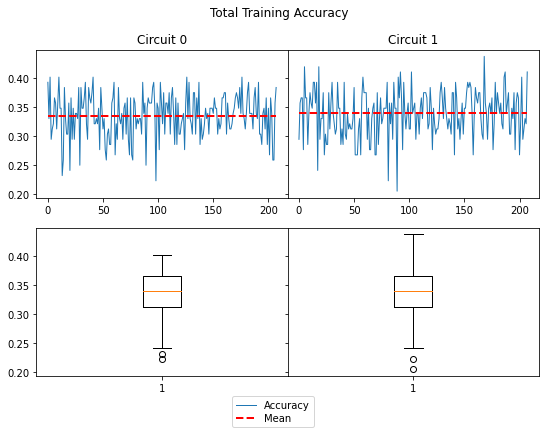

In [8]:


fig, axs = plt.subplots(2, number_of_circuits, figsize=(9, (number_of_circuits+1)*2), sharey=True, gridspec_kw={'wspace':0})
for i, entry in enumerate(train_acc_per_circuit):
    y_mean = [np.mean(entry)]*len(entry.flatten())
    axs[0, i].plot(entry.flatten(), lw=1)
    axs[0, i].plot(y_mean, color='red', lw=2, ls='--')
    axs[0, i].set_title('Circuit ' + str(i))
    axs[number_of_circuits-1, i].boxplot(entry.flatten())
fig.suptitle('Total Training Accuracy')
plt.figlegend(['Accuracy', 'Mean'], loc='lower center', ncol=1, labelspacing=0.3)
plt.savefig(path+"total_training_accuracy.svg", format="svg", transparent=True)
plt.show()

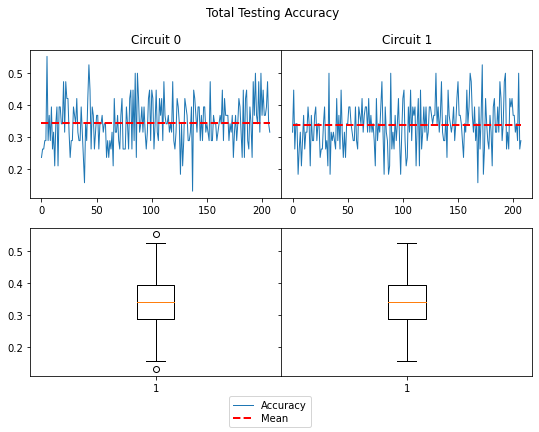

In [9]:
fig, axs = plt.subplots(2, number_of_circuits, figsize=(9, (number_of_circuits+1)*2), sharey=True, gridspec_kw={'wspace':0})
for i, entry in enumerate(test_acc_per_circuit):
    y_mean = [np.mean(entry)]*len(entry.flatten())
    axs[0, i].plot(entry.flatten(), lw=1)
    axs[0, i].plot(y_mean, color='red', lw=2, ls='--')
    axs[0, i].set_title('Circuit ' + str(i))
    axs[number_of_circuits-1, i].boxplot(entry.flatten())
fig.suptitle('Total Testing Accuracy')
plt.figlegend(['Accuracy', 'Mean'], loc='lower center', ncol=1, labelspacing=0.3)
plt.savefig(path+"total_testing_accuracy.svg", format="svg", transparent=True)
plt.show()

In [10]:
all_runs = []
for experiment in experiment_data:
    for i, result in enumerate(experiment['results']):
        run = {}
        run['circuit'] = i
        run['testMean'] = np.mean(result['scoreTesting'])
        run['trainMean'] = np.mean(result['scoreTraining'])
        run['parameters'] = experiment['optimizerSettings']
        all_runs.append(run)

In [11]:
all_runs_sorted_test = sorted(all_runs, key=lambda d: d['testMean'], reverse=True) 
mean_test_best = []
for i in range(2):
    for x in all_runs_sorted_test:
        if x['circuit'] == i:
            mean_test_best.append(x['testMean'])
            break

all_runs_sorted_train = sorted(all_runs, key=lambda d: d['trainMean'], reverse=True) 
mean_train_best = []
for i in range(2):
    for x in all_runs_sorted_train:
        if x['circuit'] == i:
            mean_train_best.append(x['trainMean'])
            break


In [16]:
circuits = []
for result in experiment_data[0]['results']:
    circuits.append(result['circuit'])

In [17]:
f = open(path + name + "_results.md", "w")
f.write("# Results for hyperparameter check for optimizer {0}\r\r".format(name))
f.write("Amount of queries: {0}\r\r".format(2))
f.write("Amount of plans per query: {0}\r\r".format(2))
f.write("Amount of problems: {0}\r\r".format(150))
f.write("Amount of shots: {0}\r\r".format(1024))
f.write("Amount of runs per parameters and circuit: {0}\r\r".format(len(experiment_data[0]['results'][0]['scoreTesting'])))
f.write("<hr>\r\r")
f.write("## Circuits:\r\r")
for i, circuit in enumerate(circuits):
    f.write("#### Circuit "+ str(i) + "\r\r")
    circuit.draw("mpl", filename=path + name+"_circuit_" + str(i) + ".png")
    f.write("![Circuit"+str(i)+"]("+name+"_circuit_" + str(i) + ".png)\r\r")
f.write("<hr>\r\r")
f.write("## Result overview:\r\r")

f.write('#### Mean Score Training C0 vs C1: {:2.2} - {:2.2}\r\r'.format(mean_train_best[0], mean_train_best[1]))

f.write("![total training accuracy](total_training_accuracy.svg)\r\r")

f.write('#### Mean Score Testing C0 vs C1: {:2.2} - {:2.2}\r\r'.format(mean_test_best[0], mean_test_best[1]))

f.write("![total testing accuracy](total_testing_accuracy.svg)\r\r")
f.write("### Sorted for best Testing Accuracy:\r\r")
header = "|"
line ="|"
for k in experiment_data[0]['optimizerSettings']:
    header += k + "|"
    line += ":-:|"
header += "circuit | Testing Accuracy Mean | Training Accuracy Mean |"
line += ":-:|:-:|:-:|"

f.write(header +"\r")
f.write(line +"\r")
for run in all_runs_sorted_test:
    content = "|"
    for v in run['parameters'].values():
        content += str(v) + "|"
    content += "{} | {:2.2} | {:2.2} |".format(run['circuit'], run['testMean'], run['trainMean'])
    f.write(content +"\r")

f.write("### Sorted for best Training Accuracy:\r\r")
f.write(header +"\r")
f.write(line +"\r")
for run in all_runs_sorted_train:
    content = "|"
    for v in run['parameters'].values():
        content += str(v) + "|"
    content += "{} | {:2.2} | {:2.2} |".format(run['circuit'], run['testMean'], run['trainMean'])
    f.write(content +"\r")

f.write("### Comparison best Training and Testing:\r\r")
f.write(header +"\r")
f.write(line +"\r")
run = all_runs_sorted_train[0]
content = "|"
for v in run['parameters'].values():
    content += str(v) + "|"
content += "{} | {:2.2} | {:2.2} |".format(run['circuit'], run['testMean'], run['trainMean'])
f.write(content +"\r")
run = all_runs_sorted_test[0]
content = "|"
for v in run['parameters'].values():
    content += str(v) + "|"
content += "{} | {:2.2} | {:2.2} |".format(run['circuit'], run['testMean'], run['trainMean'])
f.write(content +"\r")

f.write("<hr>\r\r")
for i, experiment in enumerate(experiment_data):
    f.write("## Run " + str(i+1) +":\r\r")
    f.write("#### Optimizer settings:\r\r")
    header = "|"
    line ="|"
    for k in experiment['optimizerSettings']:
        header += k + "|"
        line += ":-:|"
    f.write(header +"\r")
    f.write(line +"\r")
    content = "|"
    for v in experiment['optimizerSettings'].values():
        content += str(v) + "|"
    f.write(content +"\r\r")
    f.write("### Average accuracy per circuit:\r\r")
    for j, result in enumerate(experiment['results']):
        f.write("### Circuit " + str(j) + ":\r\r")
        f.write("Training Accuracy Average: {:2.2}%\r\r".format(np.average(result['scoreTraining'])))
        f.write("#### Boxplot of results:\r\r")
        fig1, ax1 = plt.subplots()
        ax1.boxplot(result['scoreTraining'])
        plt.savefig(path+name+"_experiment_" + str(i)+ "_" +str(j)+"_training_boxplot.svg", format="svg", transparent=True)
        plt.close()
        f.write("![Boxplot"+str(j)+"]("+name+"_experiment_" + str(i)+  "_" +str(j)+"_training_boxplot.svg)\r\r")
        f.write("Testing Accuracy Average: {:2.2}%\r\r".format(np.average(result['scoreTesting'])))
        fig1, ax1 = plt.subplots()
        ax1.boxplot(result['scoreTesting'])
        plt.savefig(path+name+"_experiment_" + str(i)+  "_" +str(j)+"_testing_boxplot.svg", format="svg", transparent=True)
        plt.close()
        f.write("![Boxplot"+str(j)+"]("+name+"_experiment_" + str(i)+  "_" +str(j)+"_testing_boxplot.svg)\r\r")
    f.write("<hr>\r\r")
f.close()